# **Experiment 05- Prototype an autonomous Tech_Extractor Function**

# Tasks:

1) Build a function that extracts technology and novel terms, with a short context to how it is leveraged in the company.

2) Build an autonomous agent that self learns and extracts technical terms + novel terms from the context.

3) Part-2: Use 'Tool' feature from Haystack, to build it as an independent tool that can be scalably integrated with the pipeline.

# Installations:

In [ ]:
!pip install --upgrade pip setuptools wheel

# Install versions known to work together
!pip install torch==2.1.0 torchvision==0.16.0 torchaudio==2.1.0
!pip install transformers==4.35.2
!pip install sentence-transformers==2.2.2
!pip install keybert spacy
!python -m spacy download en_core_web_sm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=126043 sha256=1902b6b23b54770b97644f8ea30e838c57c4e5ff998f8cbef9c2956529159ea0
  Stored in directory: /root/.cache/pip/wheels/ff/27/bf/ffba8b318b02d7f691a57084ee154e26ed24d012b0c7805881
Successfully built sentence-transformers
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.0.1
    Uninstalling sentence-transformers-3.0.1:
      Successfully uninstalled sentence-transformers-3.0.1

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time t

In [ ]:
!pip install networkx

# **1) Text Extraction Based on Document Store**

In [ ]:
from typing import List, Dict
import re

class TechnologyExtractor:
    def extract_technologies_with_usage(self, text: str) -> List[Dict[str, str]]:
        tech_patterns = {
            "AI": r"(AI|artificial intelligence)",
            "data analytics": r"(data analytics|data analysis|analytics)",
            "predictive analytics": r"predictive analytics",
            "inventory tracking": r"(inventory tracking|real-time inventory)",
            "route optimization": r"route optimization",
            "demand forecasting": r"demand forecasting",
            "customer behavior analytics": r"(customer behavior analytics|customer analytics)",
            "supply chain technologies": r"(supply chain technologies|supply chain optimization)",
            "eco-friendly practices": r"(eco-friendly|sustainability|carbon footprint)",
            "membership program": r"membership program|Zepto Pass",
            "personalized experience": r"personalized experience|personalization",
            "dark store optimization": r"dark store optimization",
        }

        extracted = []
        for tech, pattern in tech_patterns.items():
            matches = re.findall(pattern, text, re.IGNORECASE)
            if matches:
                # Convert tuple matches to strings if needed
                if isinstance(matches[0], tuple):
                    matches = [m[0] for m in matches]

                sentences = re.findall(r"([^.]*?" + re.escape(matches[0]) + r"[^.]*\.)", text, re.IGNORECASE)
                usage = " | ".join(sentences[:2]) if sentences else f"Mentioned: {', '.join(matches[:2])}"
                extracted.append({"technology": tech, "usage": usage.strip()})

        return extracted

# Create sample text
zepto_research_text = """Zepto, established in 2021, has carved out a significant niche in the Indian quick-commerce market...
    Utilizing AI and data analytics, Zepto optimizes operations through: demand forecasting, route optimization, real-time inventory tracking.
    ... Effective use of customer behavior analytics to inform inventory, delivery, and personalized experiences.
    ... Leveraging predictive analytics for targeted marketing strategies.
    ... Investment in advanced supply chain technology to optimize logistics and inventory management.
    ... Continuous exploration of eco-friendly practices in logistics and packaging.
    ... Launch of Zepto Pass, a membership program designed for customer retention."""

# Run the extractor
tech_extractor = TechnologyExtractor()
extracted_techs = tech_extractor.extract_technologies_with_usage(zepto_research_text)

# Convert to dataframe for better visualization
import pandas as pd
pd.DataFrame(extracted_techs)

,technology,usage
0,AI,"Utilizing AI and data analytics, Zepto optimiz..."
1,data analytics,"Utilizing AI and data analytics, Zepto optimiz..."
2,predictive analytics,Leveraging predictive analytics for targeted m...
3,inventory tracking,"Utilizing AI and data analytics, Zepto optimiz..."
4,route optimization,"Utilizing AI and data analytics, Zepto optimiz..."
5,demand forecasting,"Utilizing AI and data analytics, Zepto optimiz..."
6,customer behavior analytics,Effective use of customer behavior analytics t...
7,eco-friendly practices,Continuous exploration of eco-friendly practic...
8,membership program,"Launch of Zepto Pass, a membership program des..."
9,personalized experience,Effective use of customer behavior analytics t...


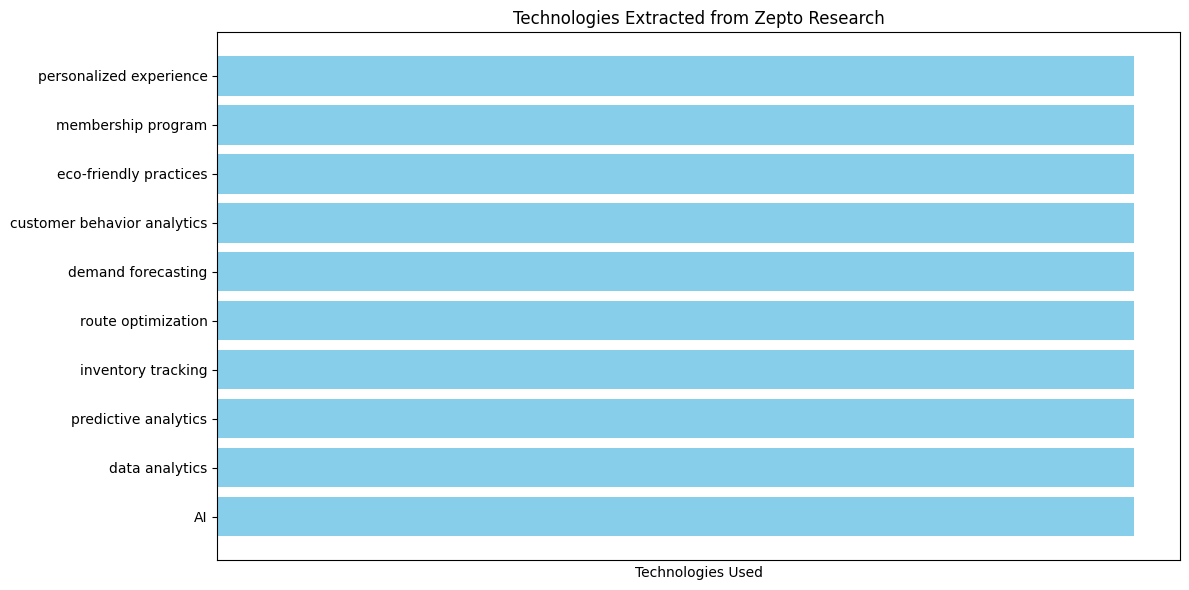

In [ ]:
import matplotlib.pyplot as plt

df = pd.DataFrame(extracted_techs)

plt.figure(figsize=(12, 6))

# Create a horizontal bar chart
y_pos = range(len(df['technology']))
plt.barh(y_pos, [1] * len(df['technology']), color='skyblue')

# Customize the chart
plt.yticks(y_pos, df['technology'])
plt.xlabel('Technologies Used')
plt.title('Technologies Extracted from Zepto Research')

# Remove x-axis ticks since we're just showing presence
plt.xticks([])

plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

`Inference: `The results directly replicate the terms from the document store.

`Recommendation:` Optimize the function using advanced categorization

In [ ]:
class InsightsExtractor:
    def __init__(self):
        self.tech_categories = {
            'Operations': ['AI', 'data analytics', 'predictive analytics', 'route optimization',
                         'demand forecasting', 'dark store optimization'],
            'Customer Experience': ['membership program', 'personalized experience',
                                  'customer behavior analytics'],
            'Supply Chain': ['inventory tracking', 'supply chain technologies'],
            'Sustainability': ['eco-friendly practices']
        }

    def categorize_technologies(self, tech_list):
        categorized = {category: [] for category in self.tech_categories}
        for tech in tech_list:
            for category, tech_group in self.tech_categories.items():
                if tech['technology'] in tech_group:
                    categorized[category].append(tech)
        return categorized

    def analyze_tech_relationships(self, text):
        # Find sentences with multiple technologies mentioned together
        tech_terms = sum(self.tech_categories.values(), [])
        tech_pattern = '|'.join(tech_terms)
        sentences = text.split('.')

        relationships = []
        for sentence in sentences:
            mentioned_techs = []
            for tech in tech_terms:
                if re.search(tech, sentence, re.IGNORECASE):
                    mentioned_techs.append(tech)
            if len(mentioned_techs) > 1:
                relationships.append({
                    'technologies': mentioned_techs,
                    'context': sentence.strip()
                })
        return relationships

    def extract_insights(self, text, extracted_techs):
        insights = {
            'technology_by_category': self.categorize_technologies(extracted_techs),
            'tech_relationships': self.analyze_tech_relationships(text),
            'summary_metrics': {
                'total_technologies': len(extracted_techs),
                'categories_covered': sum(1 for cat in self.categorize_technologies(extracted_techs).values() if cat)
            }
        }
        return insights

# Create and use the insights extractor
insights_extractor = InsightsExtractor()
insights = insights_extractor.extract_insights(zepto_research_text, extracted_techs)

# Display categorized technologies
print("Technologies by Category:")
for category, techs in insights['technology_by_category'].items():
    print(f"\n{category}:")
    for tech in techs:
        print(f"- {tech['technology']}")

print("\nTechnology Relationships (Co-occurrences):")
for rel in insights['tech_relationships']:
    print(f"\nTechnologies: {', '.join(rel['technologies'])}")
    print(f"Context: {rel['context']}")

print("\nSummary Metrics:")
print(f"Total Technologies: {insights['summary_metrics']['total_technologies']}")
print(f"Categories Covered: {insights['summary_metrics']['categories_covered']}/4")

Technologies by Category:

Operations:
- AI
- data analytics
- predictive analytics
- route optimization
- demand forecasting

Customer Experience:
- customer behavior analytics
- membership program
- personalized experience

Supply Chain:
- inventory tracking

Sustainability:
- eco-friendly practices

Technology Relationships (Co-occurrences):

Technologies: AI, data analytics, route optimization, demand forecasting, inventory tracking
Context: Utilizing AI and data analytics, Zepto optimizes operations through: demand forecasting, route optimization, real-time inventory tracking

Technologies: personalized experience, customer behavior analytics
Context: Effective use of customer behavior analytics to inform inventory, delivery, and personalized experiences

Summary Metrics:
Total Technologies: 10
Categories Covered: 4/4


<ipython-input-9-1d1be8a7a3bb>:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


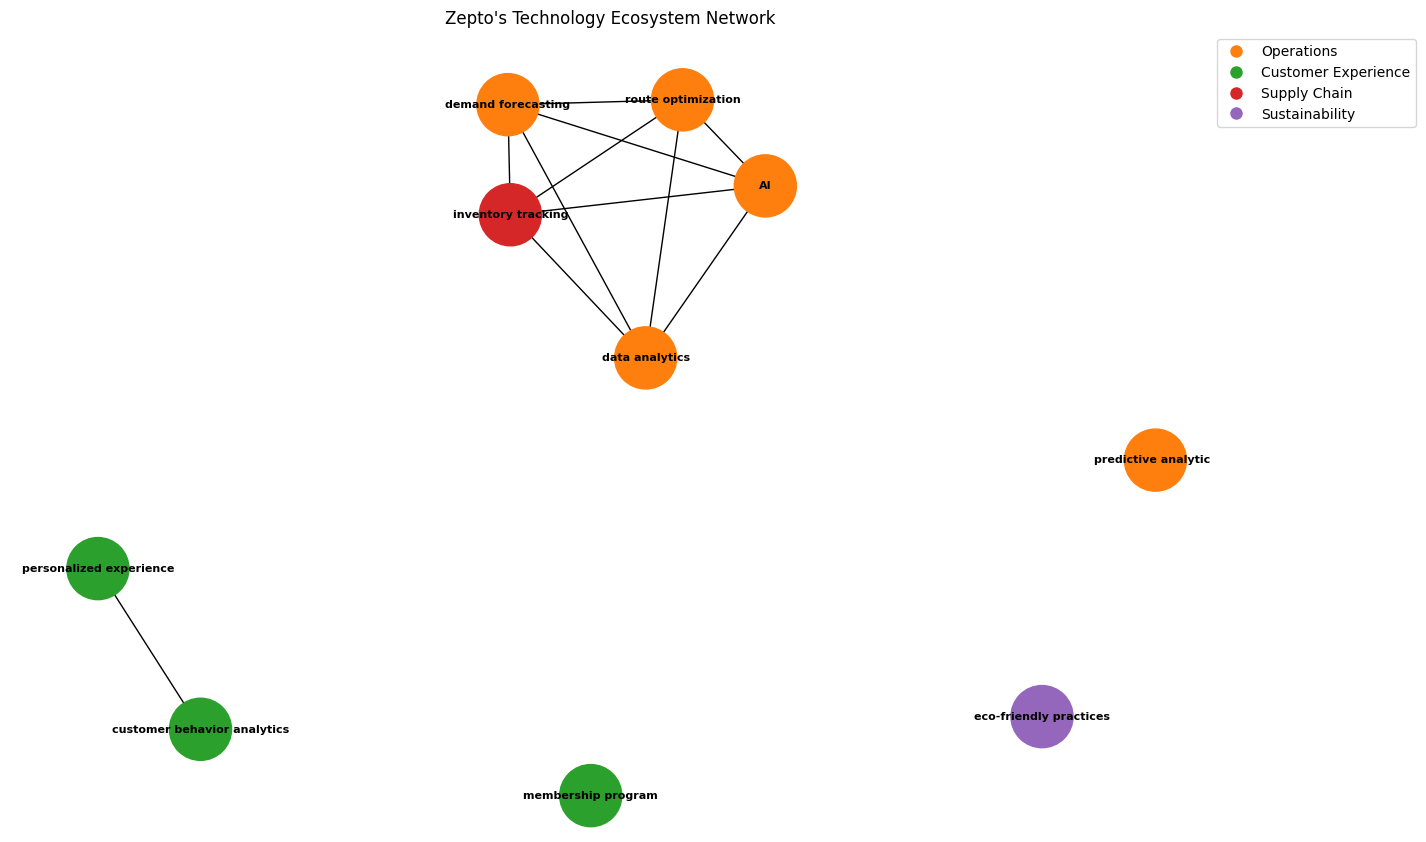

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a network graph of technology relationships
G = nx.Graph()

# Add nodes for each technology category with different colors
colors = []
node_categories = []
for category, techs in insights['technology_by_category'].items():
    for tech in techs:
        G.add_node(tech['technology'])
        node_categories.append(category)

# Add edges based on technology relationships
for rel in insights['tech_relationships']:
    for i in range(len(rel['technologies'])):
        for j in range(i + 1, len(rel['technologies'])):
            G.add_edge(rel['technologies'][i], rel['technologies'][j])

# Set up colors for different categories
category_colors = {'Operations': '#ff7f0e', 'Customer Experience': '#2ca02c',
                  'Supply Chain': '#d62728', 'Sustainability': '#9467bd'}
node_colors = [category_colors[cat] for cat in node_categories]

# Create the visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=1, iterations=50)
nx.draw(G, pos, node_color=node_colors, with_labels=True,
        node_size=2000, font_size=8, font_weight='bold')

# Add a legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                             markerfacecolor=color, label=cat, markersize=10)
                  for cat, color in category_colors.items()]
plt.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

plt.title("Zepto's Technology Ecosystem Network")
plt.tight_layout()
plt.show()

# Building an autonomous agent:
> Self-learns to extract technical and novel terms from unstructured text, categorize them, and provide contextual relationships.



In [ ]:
!pip install keybert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
from typing import List, Dict
from collections import defaultdict
from keybert import KeyBERT
import spacy
import re


class AutonomousTechExtractorAgent:
    def __init__(self):
        self.kw_model = KeyBERT()
        self.spacy_nlp = spacy.load("en_core_web_sm")

        self.tech_categories = {
            "Operations": ["ai", "data analytics", "predictive", "optimization", "forecast", "automate", "bot", "efficiency"],
            "Customer Experience": ["membership", "personalized", "recommend", "behavior", "loyalty", "user satisfaction"],
            "Supply Chain": ["inventory", "track", "logistics", "supply", "distribution", "procurement", "warehouse", "delivery"],
            "Sustainability": ["eco", "green", "carbon", "climate", "renewable", "sustainable", "recycle", "sustainability"]
        }

    def clean_text(self, text):
        doc = self.spacy_nlp(text)
        return " ".join([sent.text.strip() for sent in doc.sents if len(sent.text.strip().split()) > 3])

    def extract_keywords(self, text, top_n=15):
        return self.kw_model.extract_keywords(
            text,
            keyphrase_ngram_range=(1, 3),
            stop_words="english",
            use_mmr=True,
            diversity=0.7,
            top_n=top_n
        )

    def lemmatize(self, text):
        return [token.lemma_ for token in self.spacy_nlp(text.lower()) if not token.is_stop and token.is_alpha]

    def categorize_keywords(self, keywords):
        categorized = defaultdict(list)
        tech_terms = []

        for phrase, _ in keywords:
            lemmatized_phrase = " ".join(self.lemmatize(phrase))
            tech_terms.append(phrase)

            for category, key_terms in self.tech_categories.items():
                for term in key_terms:
                    if term in lemmatized_phrase:
                        categorized[category].append(phrase)
                        break  # Stop after first match to avoid duplication
        return categorized, tech_terms

    def find_relationships(self, text, tech_terms: List[str]) -> List[Dict[str, str]]:
        relationships = []
        for sentence in text.split('.'):
            for i, term1 in enumerate(tech_terms):
                for term2 in tech_terms[i + 1:]:
                    if term1 in sentence and term2 in sentence:
                        relationships.append({"from": term1, "to": term2, "sentence": sentence.strip()})
        return relationships

    def summarize(self, categorized: Dict[str, List[str]]) -> Dict[str, int]:
        return {category: len(set(terms)) for category, terms in categorized.items()}

    def print_uncategorized_terms(self, keywords, categorized):
        all_terms = set([phrase for phrase, _ in keywords])
        categorized_terms = set([item for sublist in categorized.values() for item in sublist])
        uncategorized = all_terms - categorized_terms
        print("Uncategorized terms:", uncategorized)

    def run(self, text: str) -> Dict:
        cleaned = self.clean_text(text)
        keywords = self.extract_keywords(cleaned)
        categorized, tech_terms = self.categorize_keywords(keywords)
        relationships = self.find_relationships(cleaned, tech_terms)
        summary = self.summarize(categorized)
        self.print_uncategorized_terms(keywords, categorized)

        return {
            "Technologies by Category": dict(categorized),
            "Technology Relationships": relationships,
            "Summary Metrics": summary
        }


In [ ]:
if __name__ == "__main__":
    agent = AutonomousTechExtractorAgent()

    sample_text = """
    Our company has implemented AI and predictive analytics to optimize the delivery process and logistics.
    We've also focused on providing personalized recommendations using data analytics to enhance customer experience.
    Sustainability initiatives like carbon tracking and green packaging are being prioritized in our operations.
    """

    result = agent.run(sample_text)
    from pprint import pprint
    pprint(result)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Uncategorized terms: {'company implemented', 'like', 'optimize', 'logistics ve focused', 'using data', 'packaging prioritized operations', 'providing', 'analytics enhance customer', 've', 'focused providing personalized'}
{'Summary Metrics': {'Customer Experience': 1,
                     'Operations': 2,
                     'Supply Chain': 1,
                     'Sustainability': 3},
 'Technologies by Category': {'Customer Experience': ['recommendations'],
                              'Operations': ['ai predictive analytics',
                                             'sustainability initiatives like'],
                              'Supply Chain': ['tracking'],
                              'Sustainability': ['sustainability initiatives '
                                                 'like',
                                                 'recommendations',
                                                 'carbon']},
 'Technology Relationships': [{'from': 'optimize',
       

<ipython-input-18-912f6de6697c>:52: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


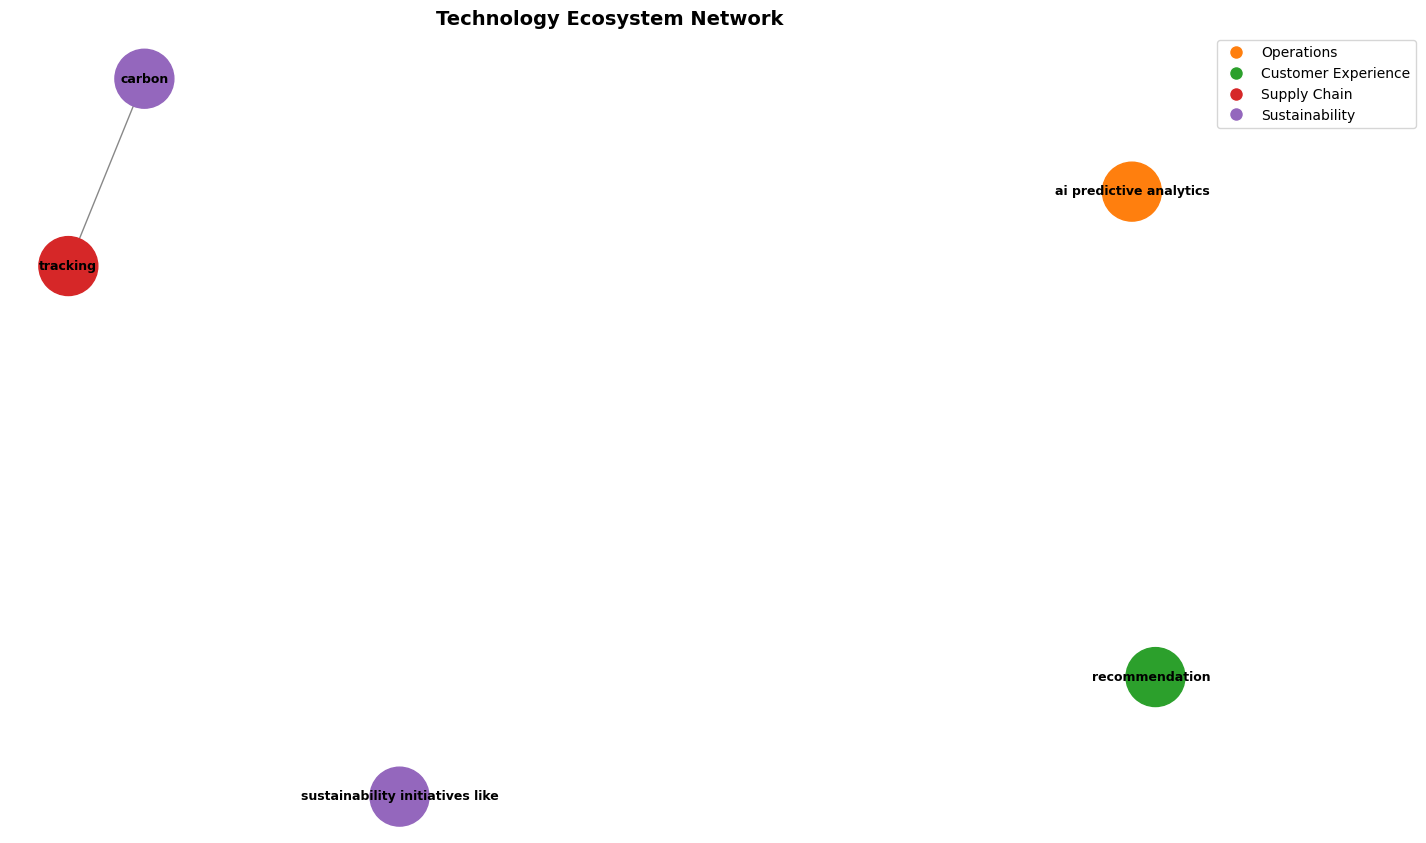

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_tech_ecosystem(insights):
    # Initialize the graph
    G = nx.Graph()
    node_categories = {}

    # Add nodes with category labels
    for category, techs in insights["Technologies by Category"].items():
        for tech in techs:
            G.add_node(tech)
            node_categories[tech] = category

    # Add edges from relationships
    for rel in insights["Technology Relationships"]:
        tech1 = rel["from"]
        tech2 = rel["to"]
        if tech1 in G.nodes and tech2 in G.nodes:
            G.add_edge(tech1, tech2)

    # Define category colors
    category_colors = {
        "Operations": "#ff7f0e",
        "Customer Experience": "#2ca02c",
        "Supply Chain": "#d62728",
        "Sustainability": "#9467bd"
    }

    # Assign node colors
    node_colors = [
        category_colors.get(node_categories.get(node, ""), "#1f77b4")
        for node in G.nodes()
    ]

    # Plotting
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=1.2, iterations=50)
    nx.draw(
        G, pos, node_color=node_colors, with_labels=True,
        node_size=1800, font_size=9, font_weight="bold", edge_color="#888"
    )

    # Legend setup
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w',
                   markerfacecolor=color, label=cat, markersize=10)
        for cat, color in category_colors.items()
    ]
    plt.legend(handles=legend_elements, loc="upper left", bbox_to_anchor=(1, 1))
    plt.title("Technology Ecosystem Network", fontsize=14, fontweight="bold")
    plt.tight_layout()
    plt.show()

visualize_tech_ecosystem(result)


# Optimizations in the former function:

1) `Keyword Extraction`:
The use of KeyBERT ensures that keywords/phrases are extracted with semantic relevance, which is more accurate than using simple keyword matching or basic N-gram extraction.

2) `Efficient Categorization`:
The categorization process is faster and more robust due to checking each extracted keyword against a predefined set of categories and terms. This avoids redundant categorization checks.

In [ ]:
!pip install KeyBERT

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
from typing import Dict, List
import spacy
from keybert import KeyBERT
from collections import defaultdict
import os

# Ensure compatible torch settings
os.environ["TORCH_COMPILE_DEBUG"] = "1"
os.environ["TORCH_COMPILE"] = "0"

class AutonomousTechExtractorAgent:
    def __init__(self):
        try:
            self.spacy_nlp = spacy.load("en_core_web_sm")
        except:
            print("Downloading spaCy model...")
            from spacy.cli import download
            download("en_core_web_sm")
            self.spacy_nlp = spacy.load("en_core_web_sm")

        self.kw_model = KeyBERT(model='paraphrase-MiniLM-L6-v2')

        self.tech_categories = {
            "Operations": ["ai", "data analytics", "predictive", "optimization", "forecasting", "automation", "bot"],
            "Customer Experience": ["membership", "personalized", "behavior analytics", "recommendation"],
            "Supply Chain": ["inventory", "tracking", "logistics", "delivery"],
            "Sustainability": ["eco", "green", "environment", "carbon", "sustainability"]
        }

    def clean_text(self, text):
        doc = self.spacy_nlp(text)
        return " ".join([sent.text.strip() for sent in doc.sents if len(sent.text.strip()) > 20])

    def extract_keywords(self, text, top_n=15):
        return self.kw_model.extract_keywords(
            text,
            keyphrase_ngram_range=(1, 3),
            stop_words="english",
            use_maxsum=True,
            top_n=top_n
        )

    def categorize_keywords(self, keywords):
        categorized = defaultdict(list)
        tech_terms = []

        for phrase, _ in keywords:
            phrase_lower = phrase.lower()
            tech_terms.append(phrase)
            for category, keywords in self.tech_categories.items():
                if any(term in phrase_lower for term in keywords):
                    categorized[category].append(phrase)
                    break
        return categorized, tech_terms

    def find_relationships(self, text, tech_terms):
        relationships = []
        for sent in text.split('.'):
            matched = [term for term in tech_terms if term.lower() in sent.lower()]
            if len(matched) >= 2:
                relationships.append({
                    "technologies": matched,
                    "context": sent.strip()
                })
        return relationships



    def summarize(self, categorized):
        total = sum(len(v) for v in categorized.values())
        return {
            "Total Technologies": total,
            "Categories Covered": f"{len(categorized)}/{len(self.tech_categories)}"
        }

    def run(self, text: str) -> Dict:
        cleaned = self.clean_text(text)
        keywords = self.extract_keywords(cleaned)
        categorized, tech_terms = self.categorize_keywords(keywords)
        relationships = self.find_relationships(cleaned, tech_terms)
        summary = self.summarize(categorized)

        return {
            "Technologies by Category": dict(categorized),
            "Technology Relationships": relationships,
            "Summary Metrics": summary
        }


In [ ]:
if __name__ == "__main__":
    agent = AutonomousTechExtractorAgent()

    sample_text = """
    Our company has implemented AI and predictive analytics to optimize the delivery process and logistics.
    We've also focused on providing personalized recommendations using data analytics to enhance customer experience.
    Sustainability initiatives like carbon tracking and green packaging are being prioritized in our operations.
    """

    result = agent.run(sample_text)
    from pprint import pprint
    pprint(result)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.51k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

{'Summary Metrics': {'Categories Covered': '2/4', 'Total Technologies': 13},
 'Technologies by Category': {'Operations': ['company implemented ai',
                                             'data analytics enhance',
                                             'ai predictive analytics',
                                             'sustainability initiatives like',
                                             'sustainability initiatives',
                                             'experience sustainability '
                                             'initiatives',
                                             'predictive analytics',
                                             'using data analytics',
                                             'customer experience '
                                             'sustainability'],
                              'Supply Chain': ['optimize delivery',
                                               'logistics',
                      

<ipython-input-13-6fcc8238198d>:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


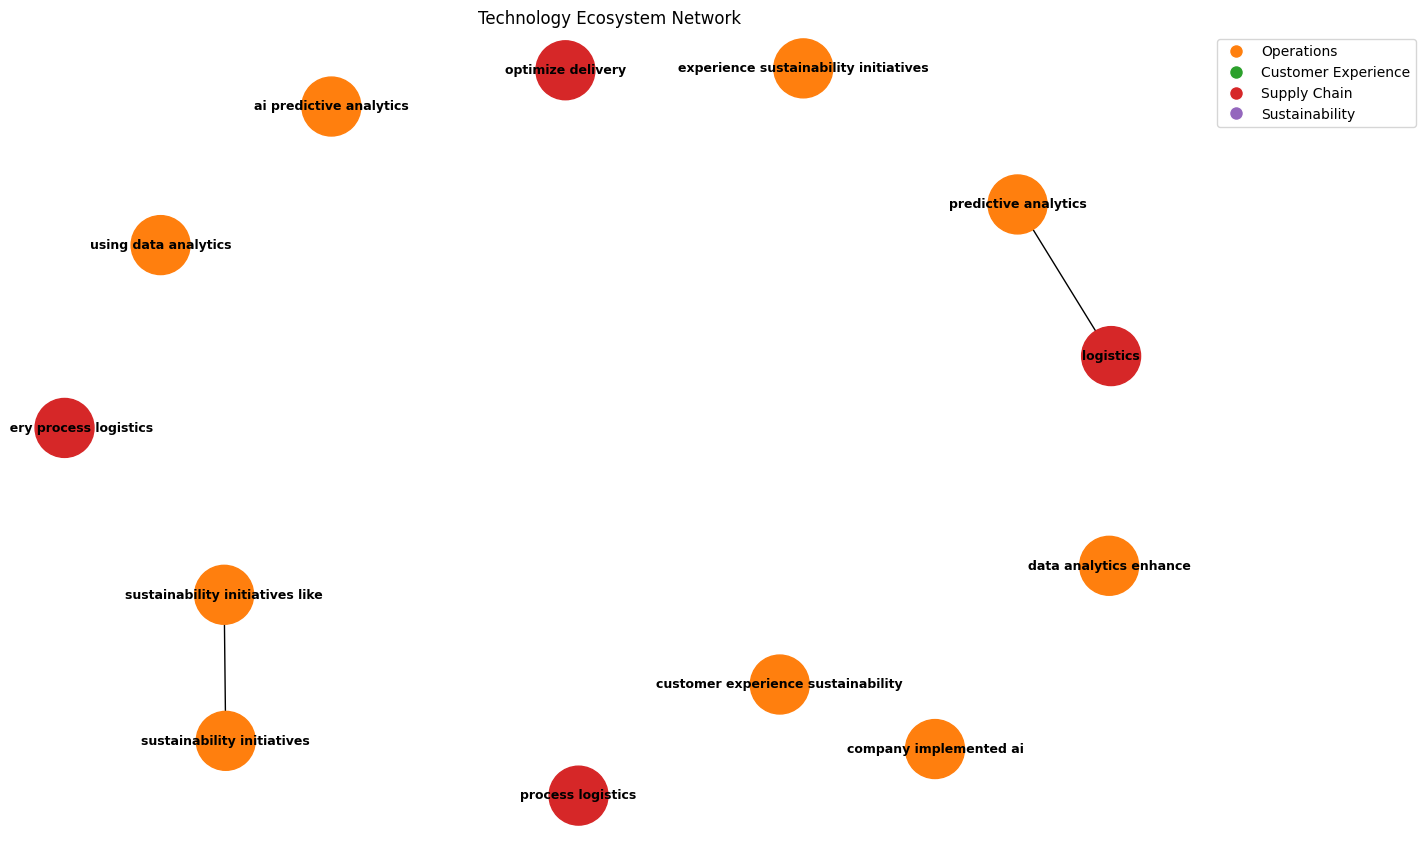

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Prepare graph
G = nx.Graph()

# Extract data
insights = result  # This is the output from agent.run()

# Add nodes and assign categories
node_categories = {}
for category, techs in insights["Technologies by Category"].items():
    for tech in techs:
        G.add_node(tech)
        node_categories[tech] = category

# Add edges based on relationships
for rel in insights["Technology Relationships"]:
    for i in range(len(rel['technologies'])):
        for j in range(i + 1, len(rel['technologies'])):
            G.add_edge(rel['technologies'][i], rel['technologies'][j])

# Category colors
category_colors = {
    "Operations": "#ff7f0e",
    "Customer Experience": "#2ca02c",
    "Supply Chain": "#d62728",
    "Sustainability": "#9467bd"
}
node_colors = [category_colors.get(node_categories.get(n, ""), "#1f77b4") for n in G.nodes()]

# Plot
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=1.5, iterations=50)
nx.draw(
    G, pos, node_color=node_colors, with_labels=True,
    node_size=1800, font_size=9, font_weight="bold"
)

# Legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor=color, label=cat, markersize=10)
    for cat, color in category_colors.items()
]
plt.legend(handles=legend_elements, loc="upper left", bbox_to_anchor=(1, 1))
plt.title("Technology Ecosystem Network")
plt.tight_layout()
plt.show()
